<div style="border:solid Black 3px; padding: 40px">
    
# Изучение закономерностей, определяющих успешность игр

Имеются исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы. Основная цель - проанализировать эти данные, найти закономерности между ними, установить характеристики наиболее успешных игр, для того, чтобы спланировать рекламную кампанию на следующий год.

План:
- Предобработка данных(изменить типы данных, обработать пропуски и т.д);
- Исследовательский анализ (проверить величины на наличие взаимосвязи, построить графики, диаграммы и т.д);
- Статистический анализ данных (выдвинуть гипотезы и проверить их);
- Вывод;
- Рекомендации.    


    
## Знакомство с данными




    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn 
from scipy import stats as st

In [2]:
data = pd.read_csv('games.csv')

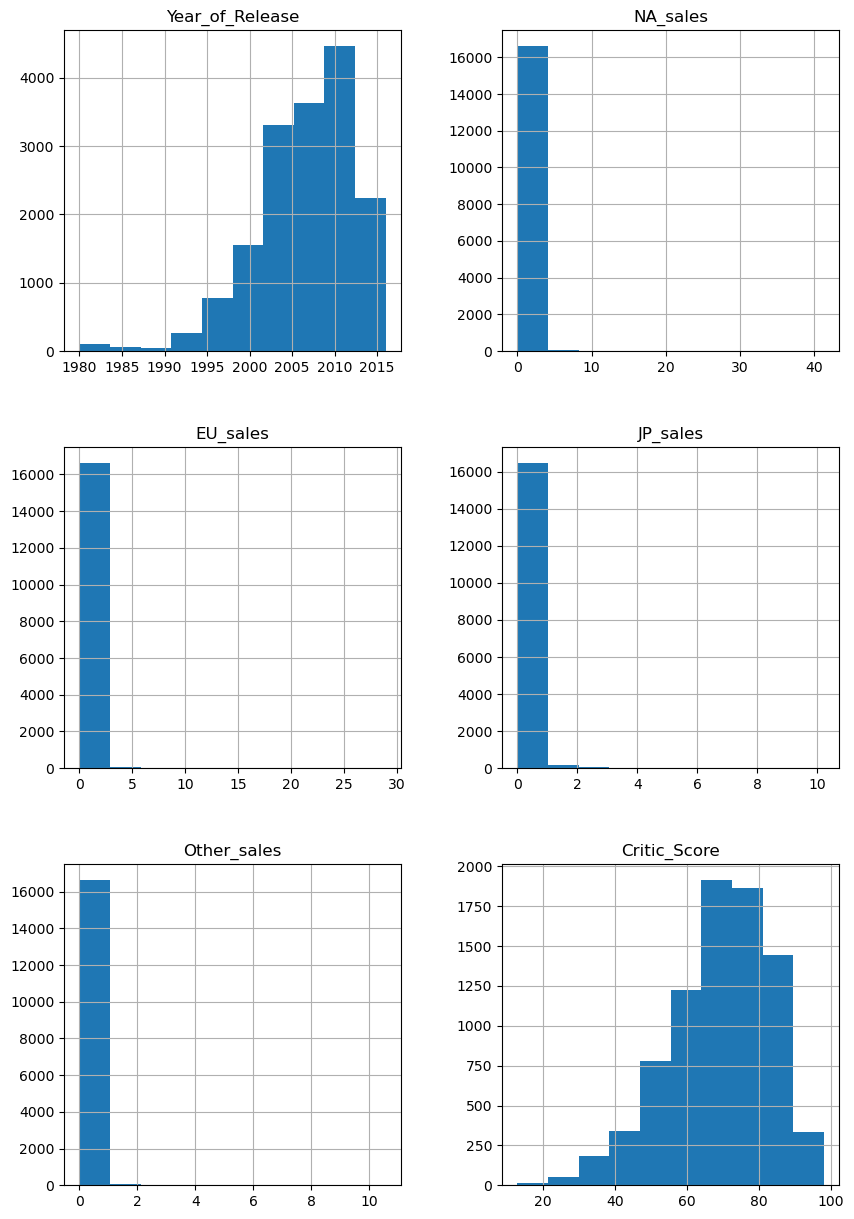

In [3]:
data.hist(figsize=(10, 15))
plt.show()

In [4]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.duplicated().sum()

0



Вывод: 
- В полученных данных 16715 строк
- В некоторых столбцах есть пропуски (Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating)
- Названия столбцов для удобства нужно привести к нижнему регистру
- Некоторые гистограммы уже достаточно информативны (например, Year_of_Release - уже понятно, что в районе 2010 года вышло больше всего игр), а некоторые нужно задать более точно (например, NA_sales)
- В данных нет явных дубликатов 



## Подготовка данных
    



### Переименование столбцов:

In [7]:
data.columns = data.columns.str.lower()

In [8]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

In [9]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди значений встречается строка tbd, которая означает "to be determined", то есть эти значения неизвестны. Заменить их на 0 не можем, повлияет на статистику, но можем заменитт на Nan

In [11]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [12]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [13]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В других столбцах с большим количеством пропусков нет значений, которые можно заменить на nan - можем приступить к обработке пропусков

In [14]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Строки с пропусками в name, year_of_release, genre можно удалить, т.к их меньше 2%, на анализ это сильно не повлияет. Пропуски в столбцах critic_score, user_score  можно было бы заменить медианным значением по жанру, но придётся подставить значения в 40-55% строк датафрейма - это сильно исказит картину (то же самое касается и удаления), поэтому оставим их как есть.

Пропуски могли возникнуть из-за того, что для каких-то игр могли не найти информацию в открытых источниках, возможно некоторые игры не оценивали пользователи и критики (например, игры вышедшие в 80-е). Для игр вышедших до 1994 года не может быть рейтинга, т.к ESRB была основана только в 1994. Также нельзя исключать технические ошибки.



In [15]:
data = data.dropna(subset=['name', 'year_of_release', 'genre'])

Поскольку для большого количества строк не указан рейтинг ESRB, а тип данных в столбце rating - object, можем заполнить пропуски строкой "не указан" для того, чтобы учесть эти данные в исследовании

In [16]:
data['rating'] = data['rating'].fillna('не указан')

In [17]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

### Изменение типов данных

Нужно поменять тип данных в столбцах year_of_release (на int, т.к год может быть только целочисленным), user_score (на float, т.к мы удалили из столбца "tbd" и там остались только дробные числа и значения nan), critic_score (целочисленные значения)

In [18]:
data['year_of_release'] = data['year_of_release'].astype('int32')
data['user_score'] = data['user_score'].astype('float')
data['critic_score'] = data['critic_score'].astype('int', errors='ignore')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


### Добавление нового столбца

In [20]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

Взглянем на данные после предобработки

In [21]:
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n


    
## Исследовательский анализ данных
    


### Исследование года выпуска

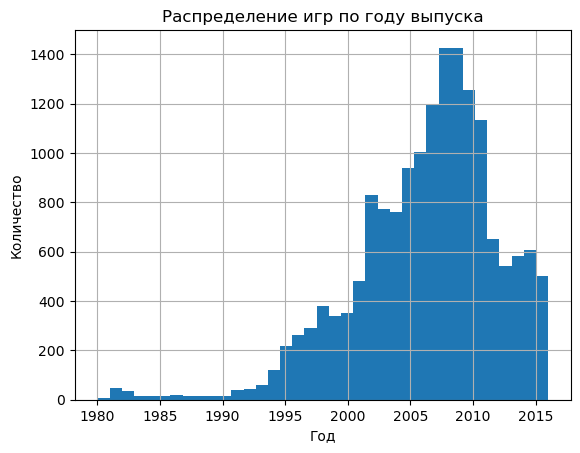

In [77]:
plt.hist(data=data, x='year_of_release', bins=37)
plt.title('Распределение игр по году выпуска')
plt.ylabel('Количество')
plt.xlabel('Год')
plt.grid(True)
plt.show()

Видим, что больше всего игр было выпущено в 2008-2011 годах. До 1995 количество игр, выпущенных за год, не превышало 250, а с 2000 начался резкий рост. В 2012 году количество игр значительно ниже, чем в 2011.

### Исследование продаж по платформам

In [23]:
data_platform = data.pivot_table(index='platform',
                                columns='year_of_release',
                                values = 'total_sales',
                                aggfunc ='sum')
data_platform

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,64.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data_platform = data_platform.sum(axis=1).sort_values(ascending=False).head()
data_platform

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
dtype: float64

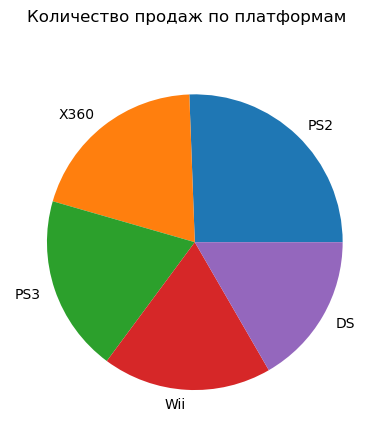

In [78]:
data_platform.plot(kind='pie',
                  subplots=True,
                  title='Количество продаж по платформам')
plt.show()

In [26]:
top = data_platform.index.values.tolist()
top

['PS2', 'X360', 'PS3', 'Wii', 'DS']

Нашли топ-5 платформ по продажам за всё время

In [27]:
top_platform = data.query('platform in @top').pivot_table(index='year_of_release',
                                                         columns='platform',
                                                         values='total_sales',
                                                         aggfunc='sum')


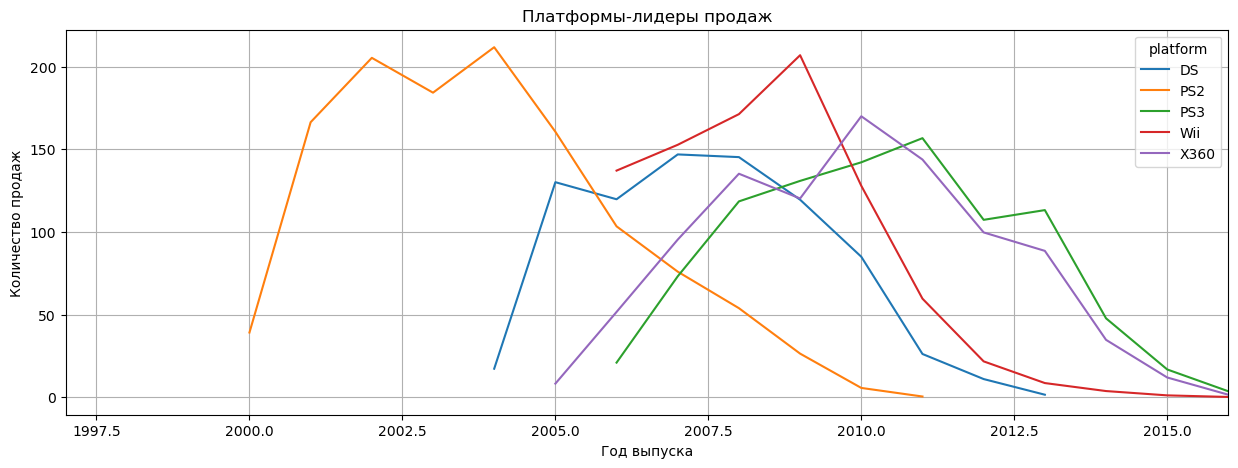

In [79]:
top_platform.plot(xlim=(1997,2016),
                 figsize=(15,5),
                 grid=True,
                 title='Платформы-лидеры продаж')
                 
plt.ylabel('Количество продаж')
plt.xlabel('Год выпуска')
plt.show()

Выяснили, что лидеры продаж - игры на платформах 'PS2', 'X360', 'PS3', 'Wii', 'DS'. Обычно продажи растут в течение 2-3 лет и падают в течение 5-6 лет. То есть время "жизни" одной платформы 7-9 лет

### Установление актуального периода

Поскольку на гистограмме, отображающей количество игр, выпущенных в каждом году, наблюдается пик на 2008-2011 годах, а затем спад, то корректнее учитытывать данные с 2012 года, т.к начиная с 2012 за каждый год продаётся примерно 50 млн игр.

In [29]:
data_actual = data.query('year_of_release > 2011').reset_index(drop=True)
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,не указан,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,не указан,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,не указан,0.01
2882,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,не указан,0.01
2883,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,не указан,0.01
2884,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,не указан,0.01


### Исследование платформ 

In [30]:
len(data_actual['platform'].unique())

11

Имеем данные об 11 платформах, значит можно попробовать отобразить продажи на одном графике

In [31]:
platform_actual = data_actual.pivot_table(index='year_of_release',
                                         columns='platform',
                                         values='total_sales',
                                         aggfunc='sum')
platform_actual

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [32]:
platform_actual.columns = ['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']
platform_actual.index.rename('year_of_release', inplace=True)
platform_actual

,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


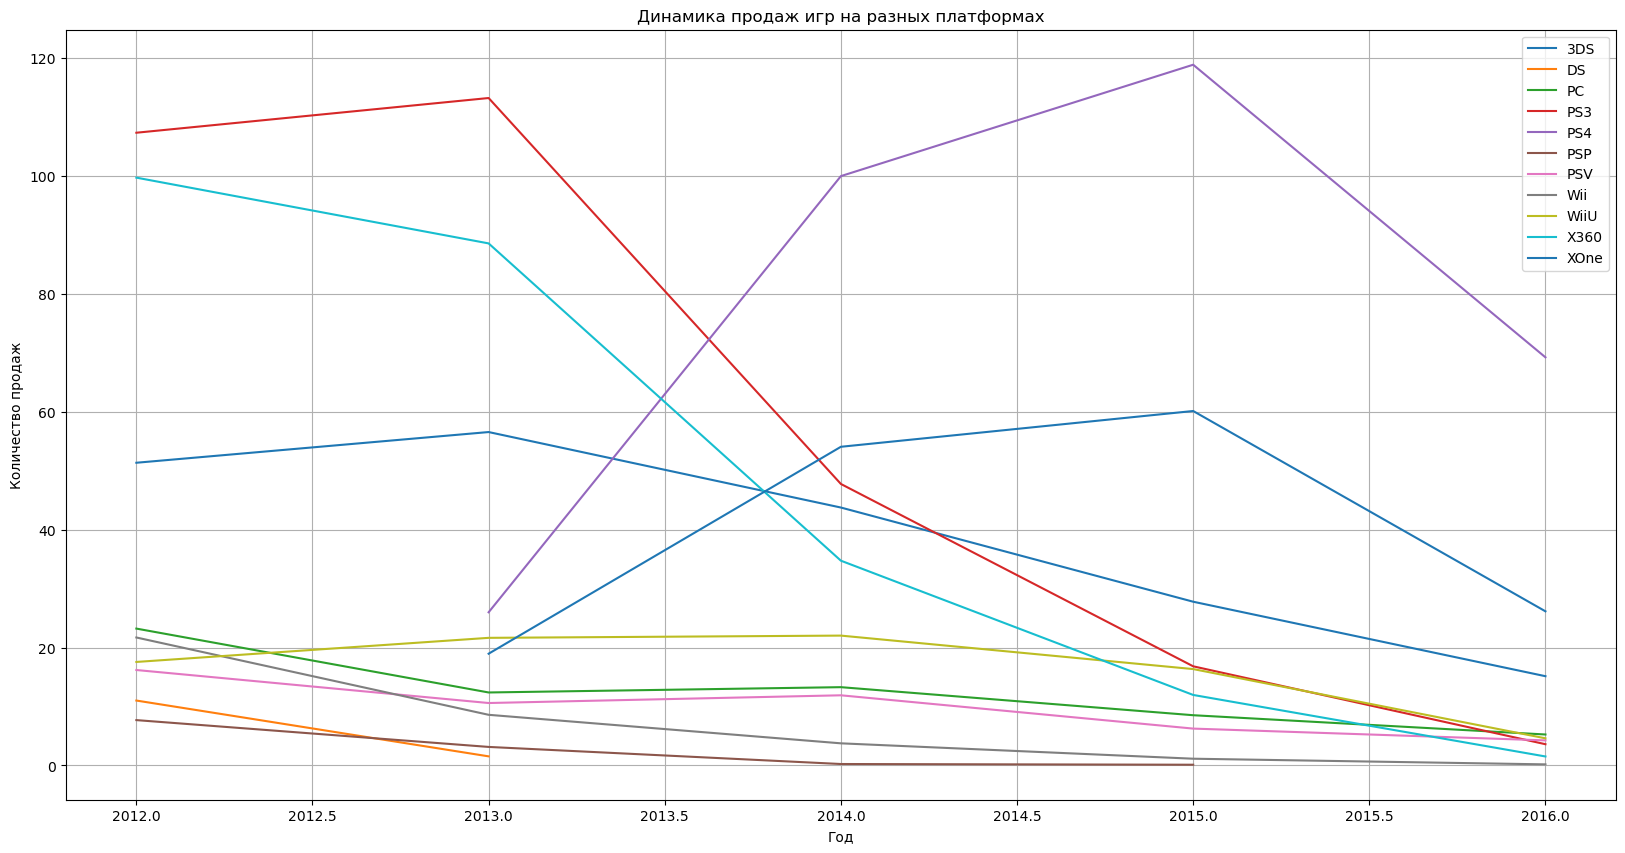

In [80]:
platform_actual.plot(figsize=(20,10),
                    grid=True,
                    title='Динамика продаж игр на разных платформах')
plt.ylabel('Количество продаж')
plt.xlabel('Год')
plt.show()

Видим, что с 2014 года больше всего продано игр на платформе PS4, однако с 2015 количество продаж таих игр уменьшается. Рост продаж не наблюдается ни на одной из платформ. Для того, чтобы выбрать потенциально прибыльные платформы, построим круговые диаграммы

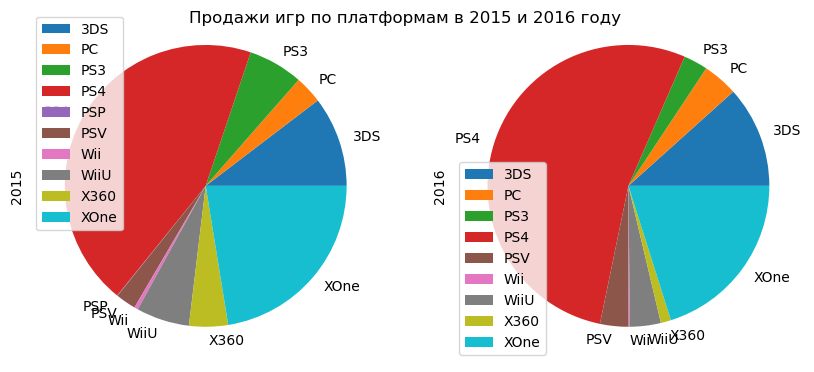

In [101]:
platform = data_actual.query('year_of_release > 2014').pivot_table(index='platform',
                                                                  columns='year_of_release',
                                                                  values='total_sales',
                                                                  aggfunc='sum').plot(kind='pie',
                                                                                     subplots=True,
                                                                                     figsize=(10,10),
                                                                                     title='Продажи игр по платформам в 2015 и 2016 году')

plt.subplots_adjust(top=1.5)                                                        
plt.show()

Видим, что по состоянию на 2015, 2016 год самые популярные платформы - PS4, XOne, 3DS. Примем их за потенциально прибыльные

### Диаграмма размаха по продажам


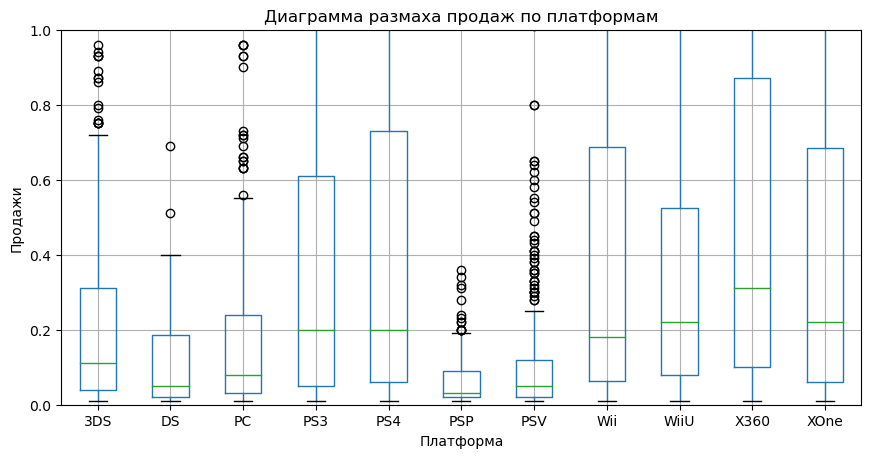

In [114]:
data_actual.boxplot(column='total_sales', by='platform', figsize=(10,5))
plt.title('Диаграмма размаха продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.ylim(0, 1)
plt.suptitle('')
plt.show()

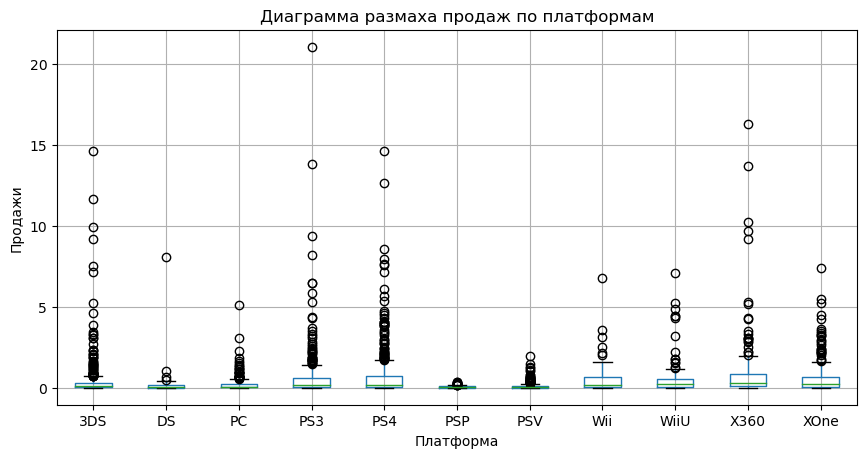

In [115]:
data_actual.boxplot(column='total_sales', by='platform', figsize=(10,5))
plt.title('Диаграмма размаха продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.suptitle('')
plt.show()

По диаграммам видно, что медианные значения количества продаж выше всего у платформ WiiU, X360, XOne. Самый большой диапазон между первым и третьим квартилем наблюдается для игр на платформах X360, WiiU, PS4. Самые сильные выбросы наблюдаются для платформ PS3 (>20 млн), 3DS, PS4, X360 (около 15 млн). Мало выбросов у платформ DS, PSP

### Влияние отзывов на продажи

По состоянию на 2016 год самые продаваемые игры - игры на платформе PS4, поэтому построим для неё диаграмму рассеяния

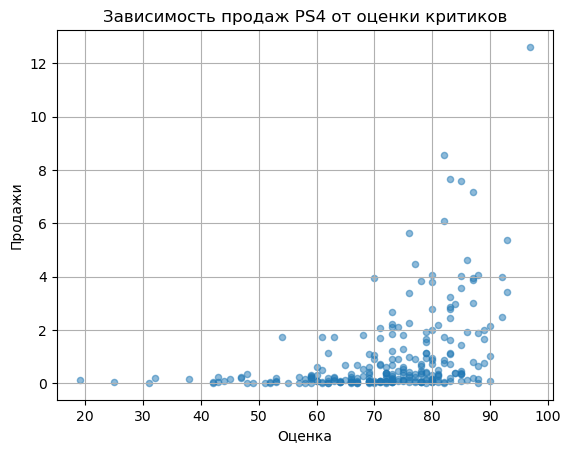

In [106]:
data_ps4 = data_actual.query('platform == "PS4"')
data_ps4.plot(kind='scatter', 
              x=['critic_score'],
              y=['total_sales'], 
              alpha = 0.5, 
              title='Зависимость продаж PS4 от оценки критиков',
              grid=True)      
plt.xlabel('Оценка')
plt.ylabel('Продажи')
plt.show()

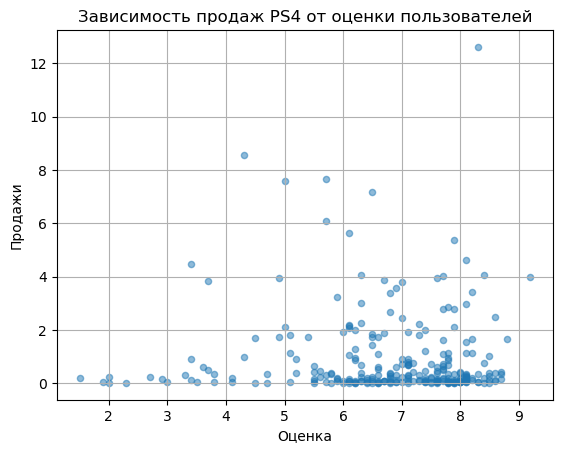

In [107]:
data_ps4.plot(kind='scatter', 
              x=['user_score'],
              y=['total_sales'], 
              alpha = 0.5, 
              title='Зависимость продаж PS4 от оценки пользователей',
              grid=True)                                          
plt.xlabel('Оценка')
plt.ylabel('Продажи')                         
plt.show()

Неочевидно. Нельзя сказать, что с ростом оценки продажи увеличиваются, т.к есть игры, которые имеют высокую оценку, но имеют не много продаж. С другой стороны с увеличением оценки появляются игры с большим количеством продаж. Посмотрим на  коэффициент корреляции Пирсона.

In [39]:
data_ps4['total_sales'].corr(data_ps4['critic_score'])

0.40656790206178145

In [40]:
data_ps4['total_sales'].corr(data_ps4['user_score'])

-0.03195711020455644

Коэффициент в случае оценки критиков по модулю больше, однако нельзя принимать значение 0,41 за доказательство прямой связи между продажами и оценкой. А отрицательное значение в случае пользовательской оценки говорит об обратной зависисмости. Для того, чтобы убедиться в этом, взглянем на другие платформы.


In [41]:
data_actual_platform = data_actual.pivot_table(index='platform',
                                columns='year_of_release',
                                values = 'total_sales',
                                aggfunc ='sum')
data_actual_platform

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
DS,11.01,1.54,NaN,NaN,NaN
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.36,113.25,47.76,16.82,3.60
PS4,NaN,25.99,100.00,118.90,69.25
PSP,7.69,3.14,0.24,0.12,NaN
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60


In [42]:
data_actual_platform = data_actual_platform.sum(axis=1).sort_values(ascending=False)
data_actual_platform

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
dtype: float64

  Платформа  Кор. c оценкой критика  Кор. c оценкой пользователей
0       PS3                0.331497                     -0.005144
1      X360                0.360573                      0.006164
2       3DS                0.320803                      0.197583
3      XOne                0.416998                     -0.068925
4      WiiU                0.348380                      0.400219


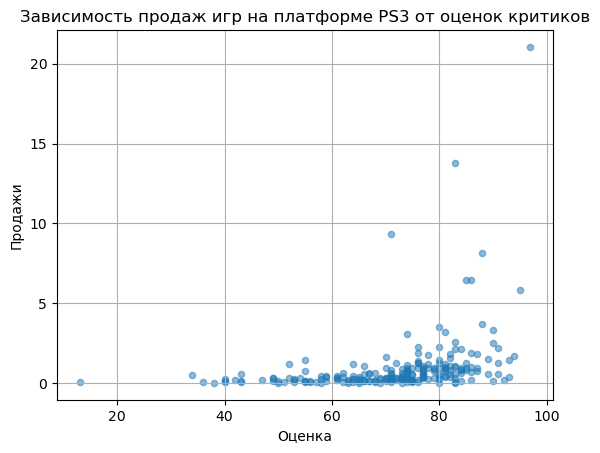

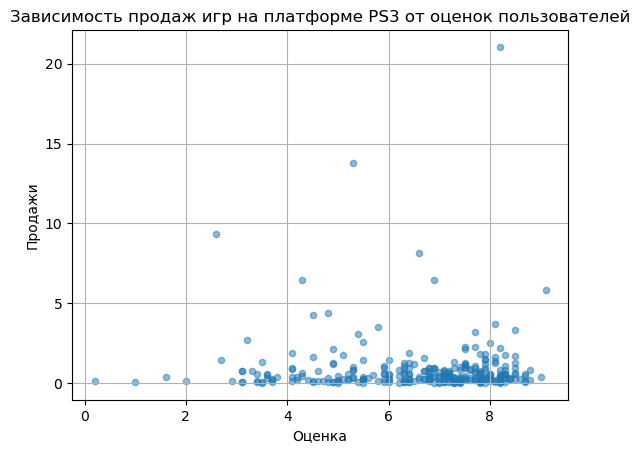

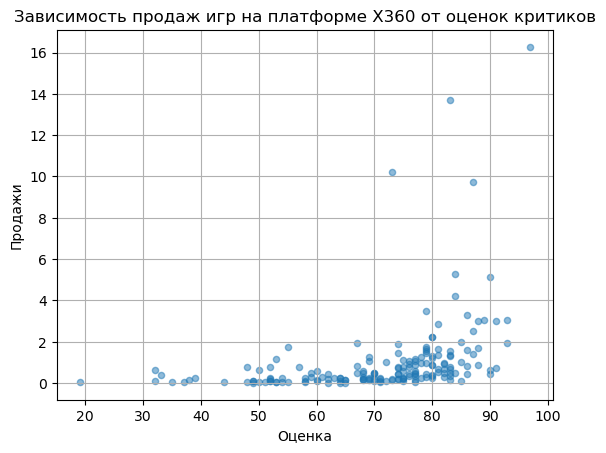

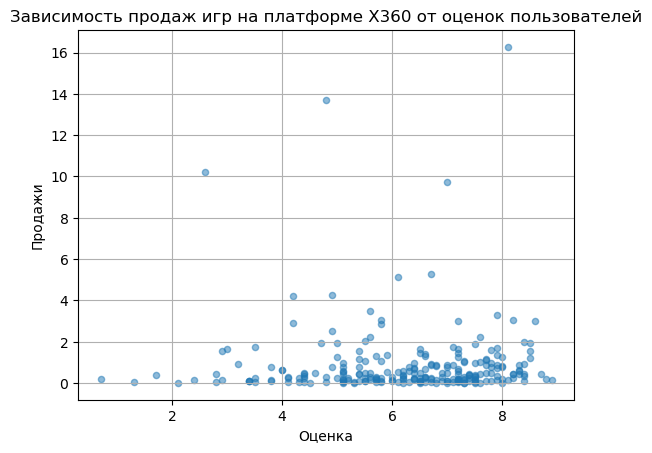

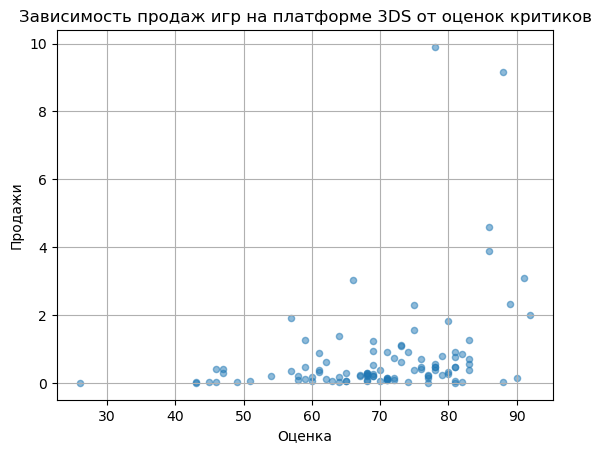

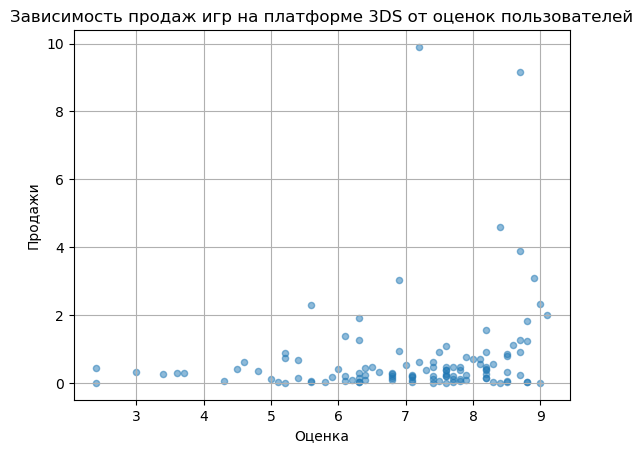

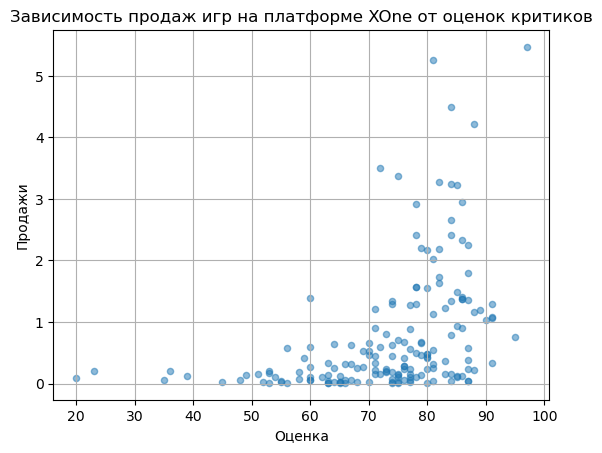

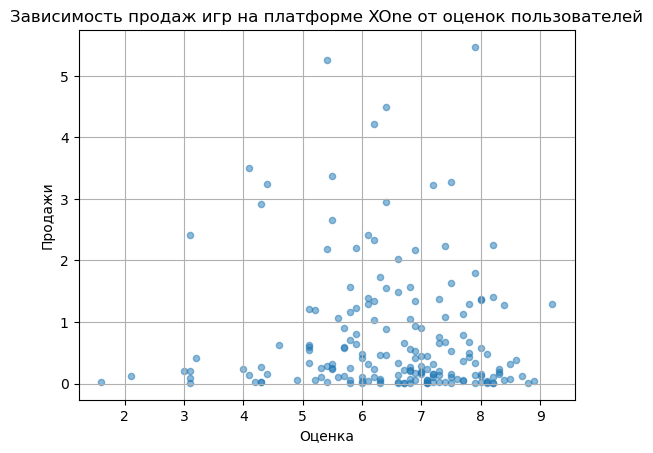

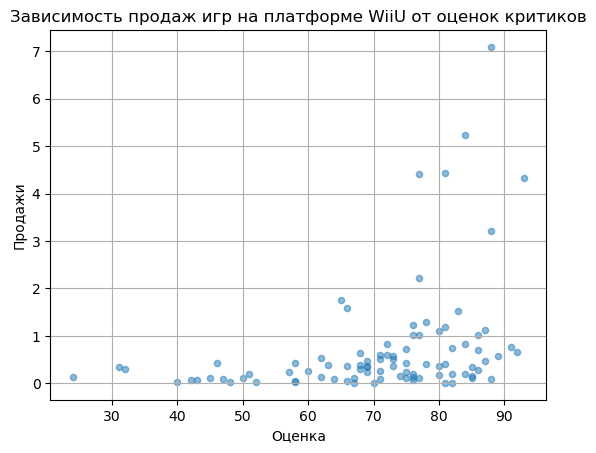

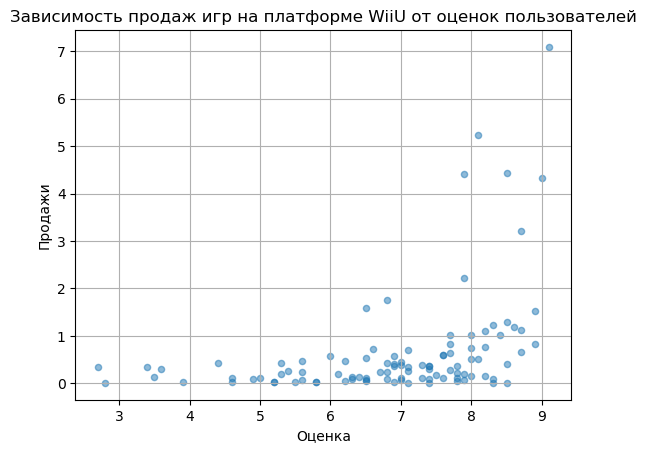

In [108]:
platform_list = ['PS3', 'X360', '3DS', 'XOne', 'WiiU']
corr = []
for pl in platform_list:
    corr_pl = [pl]
                
    data_pl = data_actual.query('platform == @ pl')
    data_pl.plot(kind='scatter', 
              x=['critic_score'],
              y=['total_sales'],
              title = f'Зависимость продаж игр на платформе {pl} от оценок критиков',   
              alpha = 0.5,                            
              grid=True)
    plt.xlabel('Оценка')
    plt.ylabel('Продажи')
                
    data_pl.plot(kind='scatter', 
              x=['user_score'],
              y=['total_sales'], 
              title = f'Зависимость продаж игр на платформе {pl} от оценок пользователей',   
              alpha = 0.5,                            
              grid=True)
    plt.xlabel('Оценка')
    plt.ylabel('Продажи')
    
    critic_corr = data_pl['total_sales'].corr(data_pl['critic_score'])
    corr_pl.append(critic_corr)
    
    user_corr = data_pl['total_sales'].corr(data_pl['user_score'])
    corr_pl.append(user_corr)
    corr.append(corr_pl)
    
   
corr_table = pd.DataFrame(corr, columns=['Платформа', 'Кор. c оценкой критика', 'Кор. c оценкой пользователей'])
print(corr_table)
plt.show()

 Теперь можно с уверенностью сказать, что рост оценки не влияет на продажи игр по платформам

### Распределение игр по жанрам

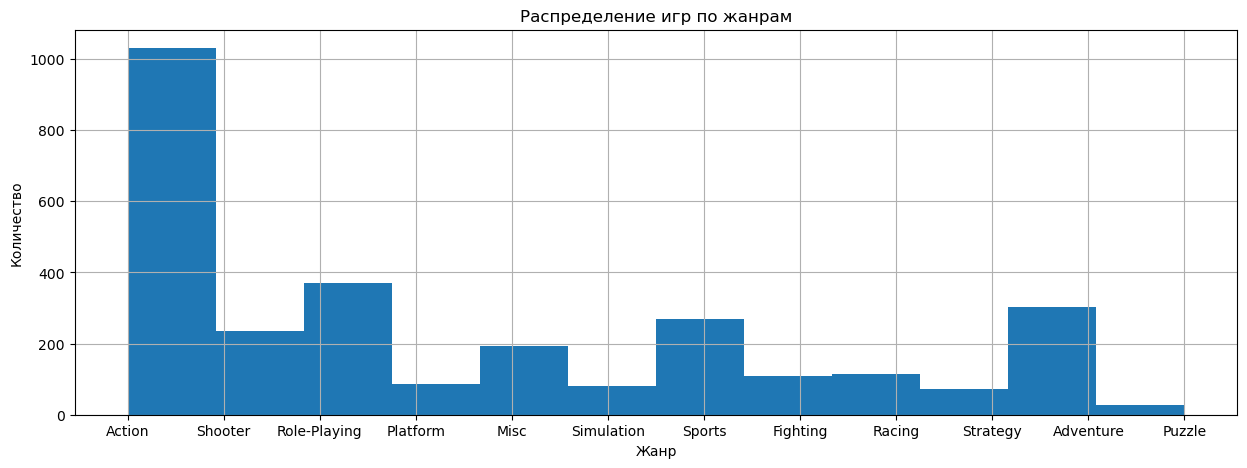

In [110]:
data_actual['genre'].hist(figsize=(15,5), bins=12)
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество')
plt.show()

Видим, что больше всего игр жанра Action(>1000), на втором месте Role-Playing (около 400) и на третьем Adventure (около 300)

In [45]:
data_genre = data_actual.pivot_table(index='genre',
                                    values='total_sales',
                                    aggfunc='median')
data_genre.sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


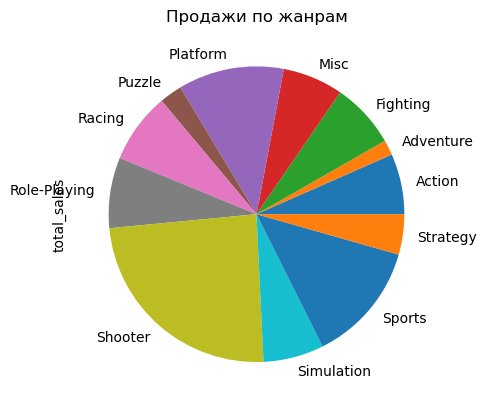

In [111]:
data_genre.plot(kind='pie',
                subplots=True,
               legend=False)
plt.title('Продажи по жанрам')
plt.show()

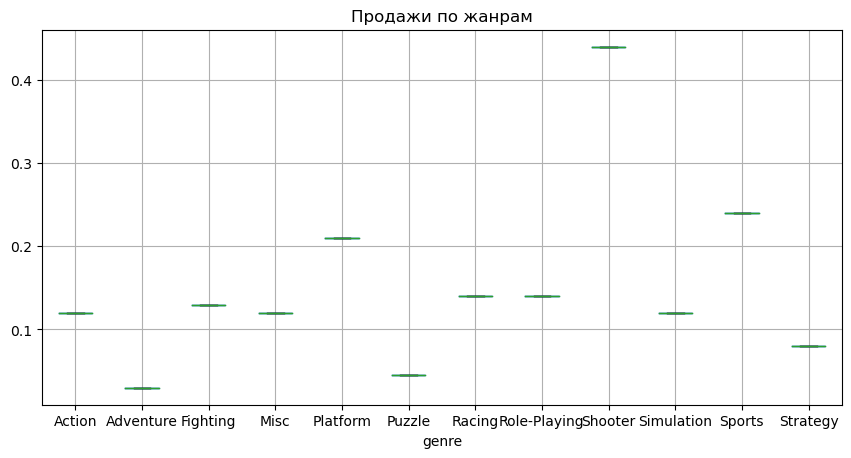

In [113]:
data_genre.boxplot(column='total_sales', by='genre', figsize=(10,5))
plt.title('Продажи по жанрам')
plt.suptitle('')
plt.show()

Самые высокие значения продаж у игр жанров Shooter, Sports, Platform. Самые низкие у Puzzle, Adventure, Strategy

## Составление портрета пользователя в каждом регионе

### Портрет пользователя из Северной Америки (NA)


In [48]:
platform_na = data_actual.pivot_table(index='platform',
                                         values='na_sales',
                                         aggfunc='sum')
platform_na

,na_sales
platform,
3DS,55.31
DS,4.59
PC,19.12
PS3,103.38
PS4,108.74
PSP,0.13
PSV,10.98
Wii,17.45
WiiU,38.10


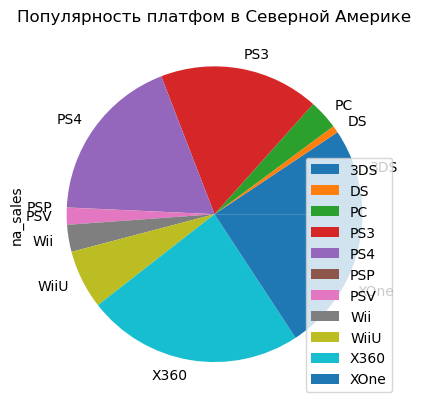

In [116]:
platform_na.plot(kind='pie',
                subplots=True)
plt.title('Популярность платфом в Северной Америке')
plt.show()

Самые продаваемые платформы в этом регионе это X360, PS4, PS3 - на их долю приходится более 50% продаж. Наименее популярны платформы PSP, DS, PSV

In [118]:
genre_na = data_actual.pivot_table(index='genre',
                                         values='na_sales',
                                         aggfunc='sum')
                                   
genre_na

,na_sales
genre,
Action,177.84
Adventure,8.92
Fighting,19.79
Misc,38.19
Platform,25.38
Puzzle,1.13
Racing,17.22
Role-Playing,64.00
Shooter,144.77


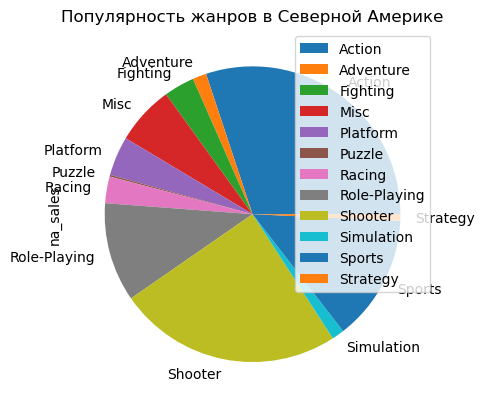

In [119]:
genre_na.plot(kind='pie',
              subplots=True)
plt.title('Популярность жанров в Северной Америке')
plt.show()

Самые популярные жанры - Action и Shooter, они составляют более 50 % продаж. Наименее популярны Puzzle, Strategy, Simulation 

In [52]:
rating_na = data_actual.pivot_table(index='rating',
                                         values='na_sales',
                                         aggfunc='sum')
rating_na

,na_sales
rating,
E,114.37
E10+,75.70
M,231.57
T,66.02
не указан,103.31


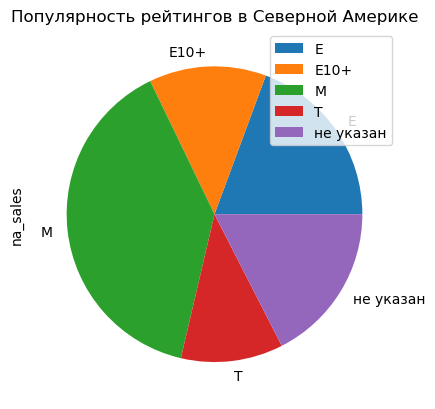

In [120]:
rating_na.plot(kind='pie',
         subplots=True)
plt.title('Популярность рейтингов в Северной Америке')
plt.show()

Лучше всего продаются игры с рейтингом М (для взрослых), хуже всего - T (13+). Для достаточно большой части игр рейтинг не указан

### Портрет пользователя из Европы (EU)

In [54]:
platform_eu = data_actual.pivot_table(index='platform',
                                         values='eu_sales',
                                         aggfunc='sum')
platform_eu

,eu_sales
platform,
3DS,42.64
DS,3.53
PC,37.76
PS3,106.86
PS4,141.09
PSP,0.42
PSV,11.36
Wii,11.92
WiiU,25.13


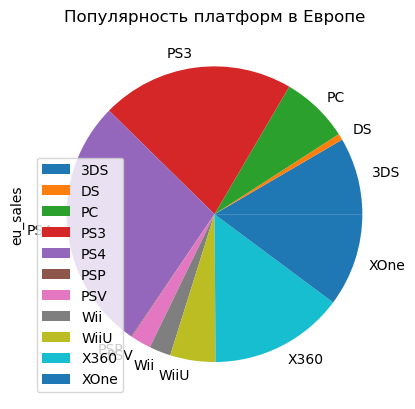

In [121]:
platform_eu.plot(kind='pie',
                subplots=True)
plt.title('Популярность платформ в Европе')
plt.show()

В Европе популярны платформы PS4, PS3, X360, на их долю приходится более 50% продаж. Наименее популярны DS и PSP

In [56]:
genre_eu = data_actual.pivot_table(index='genre',
                                         values='eu_sales',
                                         aggfunc='sum')
genre_eu

,eu_sales
genre,
Action,159.34
Adventure,9.46
Fighting,10.79
Misc,26.32
Platform,21.41
Puzzle,1.40
Racing,27.29
Role-Playing,48.53
Shooter,113.47


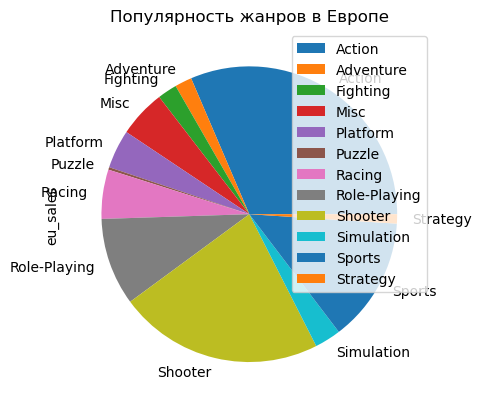

In [122]:
genre_eu.plot(kind='pie',
              subplots=True)
plt.title('Популярность жанров в Европе')
plt.show()

Лучше всего в этом регионе продаются жанры Action, Shooter, Sports, а хуже всего Puzzle, Strategy, Adventure

In [58]:
rating_eu = data_actual.pivot_table(index='rating',
                                         values='eu_sales',
                                         aggfunc='sum')
rating_eu

,eu_sales
rating,
E,113.03
E10+,55.37
M,193.96
T,52.96
не указан,91.50


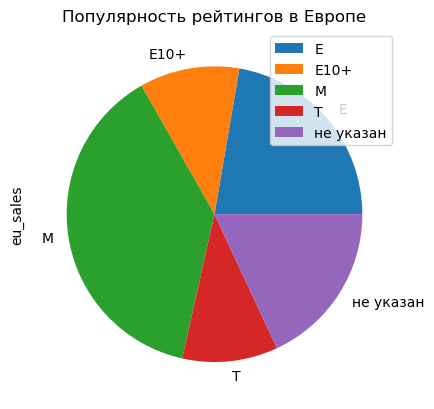

In [123]:
rating_eu.plot(kind='pie',
              subplots=True)
plt.title('Популярность рейтингов в Европе')
plt.show()

Наиболее распространённым является рейтинг M (для взрослых), наименее - Т (13+). 

### Портрет пользователя из Японии

In [60]:
platform_jp = data_actual.pivot_table(index='platform',
                                         values='jp_sales',
                                         aggfunc='sum')
platform_jp

,jp_sales
platform,
3DS,87.79
DS,3.72
PC,0.00
PS3,35.29
PS4,15.96
PSP,10.47
PSV,21.04
Wii,3.39
WiiU,13.01


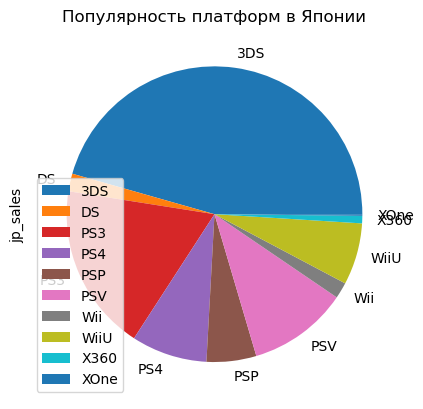

In [124]:
platform_jp.plot(kind='pie',
                subplots=True)
plt.title('Популярность платформ в Японии')
plt.show()

В данном случае картина сильно поменялась. Самой популярной платфоромой здесь является 3DS, а в Европе и Америке она даже не входила в топ-3, на втором месте PS3, на третьем PSV (В Европе и в Америке она одна из наименее популярных). Наименее популярны в Японии PC, XOne и X360 (последние две достаточно популярны в Америке и Европе)

In [62]:
genre_jp = data_actual.pivot_table(index='genre',
                                         values='jp_sales',
                                         aggfunc='sum')
genre_jp

,jp_sales
genre,
Action,52.80
Adventure,8.24
Fighting,9.44
Misc,12.86
Platform,8.63
Puzzle,2.14
Racing,2.50
Role-Playing,65.44
Shooter,9.23


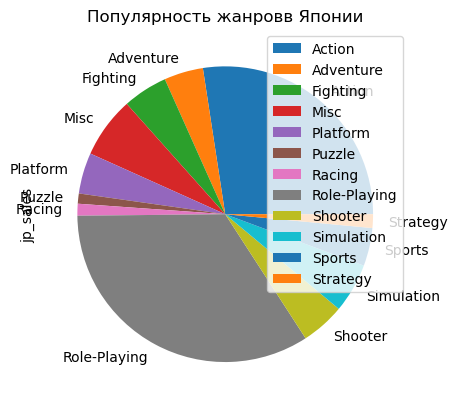

In [125]:
genre_jp.plot(kind='pie',
                subplots=True)
plt.title('Популярность жанровв Японии')
plt.show()

Наиболее популярные жанры - Role-Playing (в Европе и Америке его доля значительно меньше), Action. Меньше всего продаж у Puzzle, Racing, Strategy

In [64]:
rating_jp = data_actual.pivot_table(index='rating',
                                         values='jp_sales',
                                         aggfunc='sum')
rating_jp

,jp_sales
rating,
E,28.33
E10+,8.19
M,21.20
T,26.02
не указан,108.84


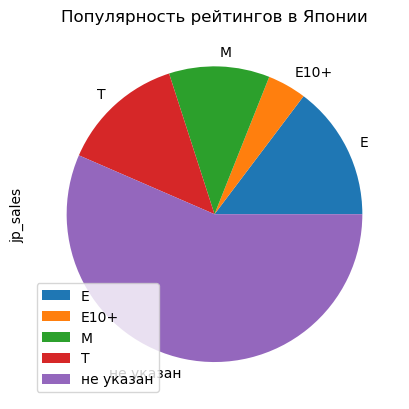

In [126]:
rating_jp.plot(kind='pie',
                subplots=True)
plt.title('Популярность рейтингов в Японии')
plt.show()

Для большей части продаж рейтинг игр не указан. Из известных наиболее распространён Е (для всех), наименее E10+ (10+)

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для проверок гипотез воспользуемся критерием Стьюдента (t-test), основанном на распределении Стьюдента, т.к оно стремится к нормальному при увеличении выборки. За нулевую гипотезу в этом случае стоит принимать гипотезу о равенстве величин, а за альтернативную - о неравенстве. 

Нулевая гипотеза H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза H1: средние пользовательские рейтинги платформ Xbox One и PC различаются

Примем уровень значимости 5%

In [66]:
data_xone = data_actual.query('platform == "XOne"')
data_pc = data_actual.query('platform == "PC"')

In [67]:
alpha = 0.01

results = st.ttest_ind(
data_xone['user_score'],
data_pc['user_score'],
equal_var = False,
nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134987
Не получилось отвергнуть нулевую гипотезу


In [68]:
print('Средний пользовательский рейтинг платформы XOne:')
data_xone['user_score'].mean()

Средний пользовательский рейтинг платформы XOne:


6.521428571428572

In [69]:
print('Средний пользовательский рейтинг платформы PC:')
data_pc['user_score'].mean()

Средний пользовательский рейтинг платформы PC:


6.428640776699029

Вероятность получить одинаковые средние 55%, поэтому не можем отвергнуть нулевую гипотезу.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза H0: средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза H1: средние пользовательские рейтинги жанров Action и Sports разные.

In [70]:
data_action = data.query('genre == "Action"')
data_sports = data.query('genre == "Sports"')

In [71]:
alpha = 0.01

results = st.ttest_ind(
data_action['user_score'],
data_sports['user_score'],
equal_var = False,
nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.07370217419279251
Не получилось отвергнуть нулевую гипотезу


In [72]:
print('Средний пользовательский рейтинг жанра Action:')
data_action['user_score'].mean()

Средний пользовательский рейтинг жанра Action:


7.058129175946546

In [73]:
print('Средний пользовательский рейтинг жанра sports:')
data_sports['user_score'].mean()

Средний пользовательский рейтинг жанра sports:


6.951433857539316

Вероятность получить одинаковые средние 7%, поэтому не можем отвергнуть нулевую гипотезу. То есть можем отвергнуть первоначальный тезис.

## Общий вывод

В полученных данных 16715 строк, в некоторых столбцах есть пропуски (Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating). Они могли возникнуть из-за того, что для каких-то игр могли не найти информацию в открытых источниках, возможно некоторые игры не оценивали пользователи и критики (например, игры вышедшие в 80-е). Для игр вышедших до 1994 года не может быть рейтинга, т.к ESRB была основана только в 1994. Также нельзя исключать технические ошибки.

Исследовательский анализ показал, что:
-  больше всего игр было выпущено в 2008-2011 годах. До 1995 количество игр, выпущенных за год, не превышало 250, а с 2000 начался резкий рост
- топ-5 платформ по продажам за всё время: PS2, X360, PS3, Wii, DS. Обычно продажи растут в течение 2-3 лет и падают в течение 5-6 лет. То есть время "жизни" одной платформы 7-9 лет
- т.к начиная с 2012 за каждый год продаётся примерно 50 млн игр, то актуальный период начинается с 2012 года
- на момент 2015-2016 года не наблюдается рост продаж ни на одной из платформ, но самыми популярными являются - PS4, XOne, 3DS (потенциально прибыльные)
- медианные значения количества продаж выше всего у платформ WiiU, X360, XOne.  Самые сильные выбросы наблюдаются для платформ PS3 (>20 млн), 3DS, PS4, X360 (около 15 млн)
- рост оценок игр на потенциально прибыльных платформах не является показателем роста продаж
- больше всего игр жанра Action(>1000), на втором месте Role-Playing (около 400) и на третьем Adventure (около 300)
- самые высокие продажи у игр жанров Shooter, Sports, Platform. Самые низкие у Puzzle, Adventure, Strategy
- в Северной Америке самые популярные платформы - X360, PS4, PS3, самые популярные жанры - Action и Shooter и больше всего продаются игры с жанром M
- для пользователей из Европы наблюдаются те же тенденции, что и для пользователей из Америки
- в Японии самые популярные платформы PS3, PSV, 3DS (две последние в Европе и Америке не слишком популярны), наиболее популярные жанры - Role-Playing (в Европе и Америке его доля значительно меньше), Action, для большей части продаж данные по рейтингу отсутствуют
Статистический анализ показал, что:
- нельзя отвергать гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- можно отвергнуть гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые

## Рекомендации

In [74]:
data_actual.loc[(data_actual['platform'] == 'PS4') & (data_actual['genre'] == 'Action') & (data_actual['rating'] == 'M')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
56,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.05
59,Assassin's Creed: Unity,PS4,2014,Action,1.19,2.07,0.08,0.62,70.0,4.9,M,3.96
60,Batman: Arkham Knight,PS4,2015,Action,1.53,1.69,0.10,0.64,87.0,7.6,M,3.96
73,Metal Gear Solid V: The Phantom Pain,PS4,2015,Action,1.09,1.36,0.49,0.48,93.0,8.2,M,3.42
74,Assassin's Creed Syndicate,PS4,2015,Action,0.81,1.99,0.07,0.52,76.0,6.8,M,3.39
96,Middle-Earth: Shadow of Mordor,PS4,2014,Action,1.01,1.43,0.05,0.47,84.0,8.1,M,2.96
101,Assassin's Creed IV: Black Flag,PS4,2013,Action,1.07,1.31,0.06,0.42,83.0,7.8,M,2.86
113,Bloodborne,PS4,2015,Action,1.03,0.81,0.26,0.38,92.0,8.6,M,2.48
126,Far Cry: Primal,PS4,2016,Action,0.60,1.25,0.06,0.35,76.0,6.3,M,2.26


In [75]:
data_actual.loc[(data_actual['platform'] == 'PS4') & (data_actual['genre'] == 'Action') & (data_actual['rating'] == 'M')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 6 to 2815
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             35 non-null     object 
 1   platform         35 non-null     object 
 2   year_of_release  35 non-null     int32  
 3   genre            35 non-null     object 
 4   na_sales         35 non-null     float64
 5   eu_sales         35 non-null     float64
 6   jp_sales         35 non-null     float64
 7   other_sales      35 non-null     float64
 8   critic_score     34 non-null     float64
 9   user_score       35 non-null     float64
 10  rating           35 non-null     object 
 11  total_sales      35 non-null     float64
dtypes: float64(7), int32(1), object(4)
memory usage: 3.4+ KB


In [76]:
data_actual.loc[(data_actual['platform'] == '3DS') & (data_actual['genre'] == 'Role-Playing')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,не указан,14.60
7,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,не указан,11.68
23,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,не указан,7.14
61,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T,3.89
72,Monster Hunter 4,3DS,2013,Role-Playing,0.00,0.00,3.44,0.00,NaN,NaN,не указан,3.44
...,...,...,...,...,...,...,...,...,...,...,...,...
2312,Medabots Girls Mission: Metabee Ver. / Rokusho...,3DS,2016,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,не указан,0.03
2407,Beyblade Burst,3DS,2016,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,не указан,0.03
2482,UnchainBlades EXXiV,3DS,2012,Role-Playing,0.00,0.00,0.02,0.00,NaN,NaN,не указан,0.02
2754,Seisou no Amazones,3DS,2013,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,не указан,0.01


 В Европе и Северной Америке было бы логично направить рекламную кампанию на продвижение игр на платформе PS4, жанра Action и рейтингом М (всего таких игр 35). В Японии же лучше продвигать игры на платформе 3DS, жанра Role-Playing (таких 79). На рейтинг ESRB в этом регионе полагаться не стоит, вероятно следует найти рейтинги принятые в Японии, провести дополнительное исследование и уже тогда решать окончательно.
